<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [35]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [15]:
import piplite
await piplite.install(['pandas'])

from js import fetch
import io
import pandas as pd

url2 = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/"
        "IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
resp2 = await fetch(url2)
buf2_js = await resp2.arrayBuffer()
buf2 = buf2_js.to_py()                  # <-- convertir a bytes de Python
df2  = pd.read_csv(io.BytesIO(buf2))

url3 = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/"
        "IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")
resp3 = await fetch(url3)
buf3_js = await resp3.arrayBuffer()
buf3 = buf3_js.to_py()                  # <-- convertir a bytes de Python
df3  = pd.read_csv(io.BytesIO(buf3))

print("Train+Val shape:", df2.shape)
print("     Test shape:", df3.shape)
df2.head(3)

Train+Val shape: (90, 18)
     Test shape: (90, 83)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


## Load the dataframe


In [7]:
import pandas as pd
import requests
from io import StringIO

# URLs
url_train_val = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
url_test      = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Descarga con requests
resp_train = requests.get(url_train_val)
resp_test  = requests.get(url_test)

# Carga en DataFrame desde la respuesta
df_train_val = pd.read_csv(StringIO(resp_train.text))
df_test      = pd.read_csv(StringIO(resp_test.text))

print("Train+Val shape:", df_train_val.shape)
print("Test shape:", df_test.shape)
df_train_val.head()

Train+Val shape: (90, 18)
Test shape: (90, 83)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
Y = df_train_val['Class'].to_numpy()

# Verificamos
print(type(Y))   # <class 'numpy.ndarray'>
print(Y.shape)   # p.ej. (90,)
print(Y[:10])    # primeros 10 valores

<class 'numpy.ndarray'>
(90,)
[0 0 0 0 0 0 1 1 0 0]


In [13]:
X = df_train_val.drop('Class', axis=1)
Y = df_train_val['Class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)

X_train shape: (63, 17)
X_valid shape: (27, 17)


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [15]:
import sklearn.preprocessing as preprocessing

In [16]:
# students get this 
transform = preprocessing.StandardScaler()

In [21]:
df_num = df_train_val.select_dtypes(include=['int64','float64'])

X = df_num.drop('Class', axis=1).to_numpy()
Y = df_num['Class'].to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, Y, test_size=0.3, random_state=42)
    
import numpy as np
print("Media (columnas 0–2):", np.round(X.mean(axis=0)[:3], 3))
print("Std   (columnas 0–2):", np.round(X.std(axis=0)[:3], 3))
print("Shapes:", X_train.shape, X_valid.shape)

Media (columnas 0–2): [ 0. -0. -0.]
Std   (columnas 0–2): [1. 1. 1.]
Shapes: (63, 7) (27, 7)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=2
)

print("Y_test shape:", Y_test.shape)   # debe salir (18,)

Y_test shape: (18,)


we can see we only have 18 test samples.


In [23]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(max_iter=1000)

logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,
    scoring='accuracy'
)

logreg_cv.fit(X_train, Y_train)

print("Mejores hiperparámetros:", logreg_cv.best_params_)
print("Precisión media CV:       ", round(logreg_cv.best_score_, 4))

Mejores hiperparámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión media CV:        0.775


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [28]:
accuracy_test = logreg_cv.score(X_test, Y_test)
print("Precisión en test:", round(accuracy_test, 4))

Precisión en test: 0.8889


Lets look at the confusion matrix:


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
  
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['did not land', 'landed'])
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title("Matriz de Confusión (Test)")
    plt.show()

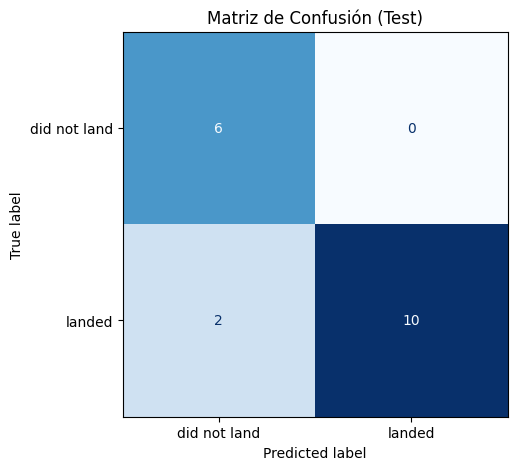

In [36]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [37]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [38]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C':       np.logspace(-3,  3, 5),
    'gamma':   np.logspace(-3,  3, 5)
}

svm = SVC()

svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

svm_cv.fit(X_train, Y_train)

print("Mejores hiperparámetros:", svm_cv.best_params_)
print("Precisión media CV:   ", round(svm_cv.best_score_, 4))

Mejores hiperparámetros: {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Precisión media CV:    0.8321


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [42]:
accuracy_svm = svm_cv.score(X_test, Y_test)
print("Precisión SVM en test:", round(accuracy_svm, 4))

Precisión SVM en test: 0.7778


We can plot the confusion matrix


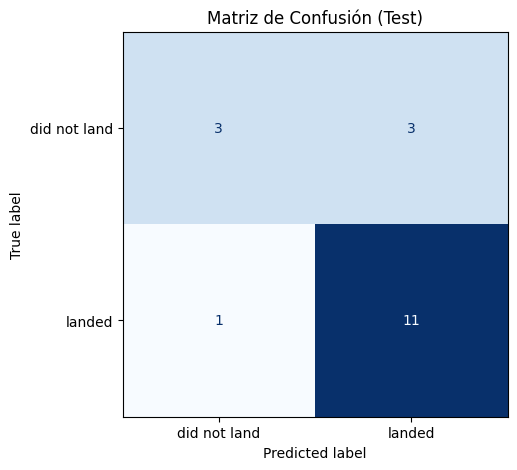

In [43]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [2*n for n in range(1,10)],
    'max_features'      : ['sqrt', 'log2'],    # <— aquí quitamos 'auto' y ponemos solo valores válidos
    'min_samples_leaf'  : [1, 2, 4],
    'min_samples_split' : [2, 5, 10]
}

tree     = DecisionTreeClassifier(random_state=42)
tree_cv  = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

tree_cv.fit(X_train, Y_train)

print("Mejores parámetros :", tree_cv.best_params_)
print("Precisión media CV :", round(tree_cv.best_score_, 4))

Mejores parámetros : {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Precisión media CV : 0.8321


In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

In [53]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8321428571428571


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Precisión en test (árbol): 0.7778


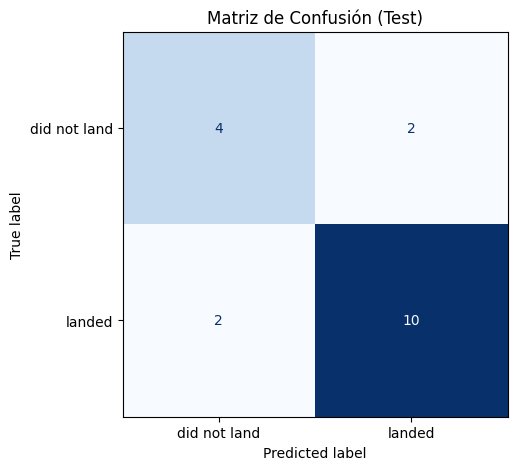

In [54]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Precisión en test (árbol):", round(accuracy_tree, 4))

yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

We can plot the confusion matrix


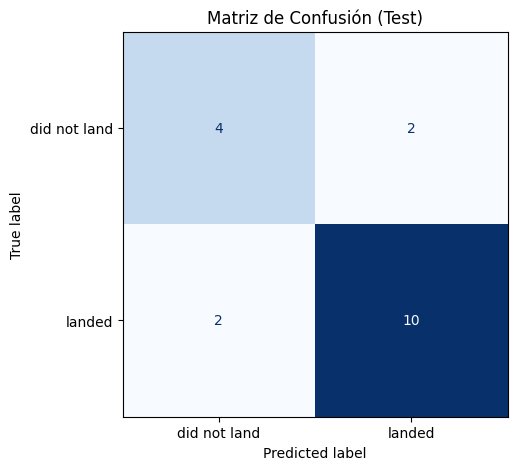

In [55]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Mejores hiperparámetros KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Precisión media CV: 0.8018
Precisión KNN en test: 0.8889


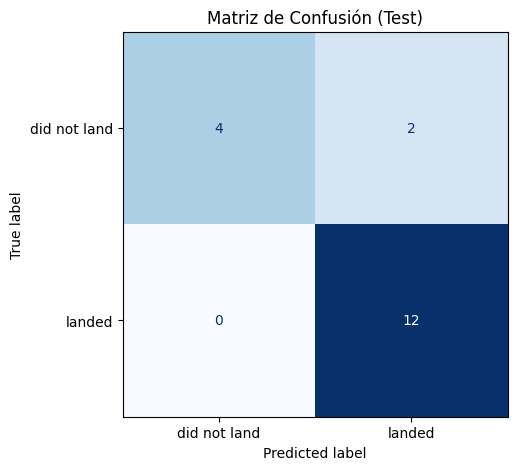

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters_knn,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

knn_cv.fit(X_train, Y_train)

print("Mejores hiperparámetros KNN:", knn_cv.best_params_)
print("Precisión media CV:", round(knn_cv.best_score_, 4))

accuracy_knn = knn_cv.score(X_test, Y_test)
print("Precisión KNN en test:", round(accuracy_knn, 4))

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [57]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [58]:
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

In [59]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [60]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
accuracy : 0.7785714285714286


Precisión KNN en test: 0.7222


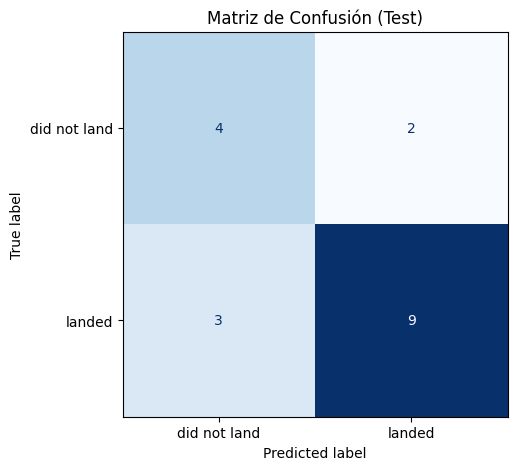

In [61]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Precisión KNN en test:", round(accuracy_knn, 4))

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Precisión KNN en test: 0.7222


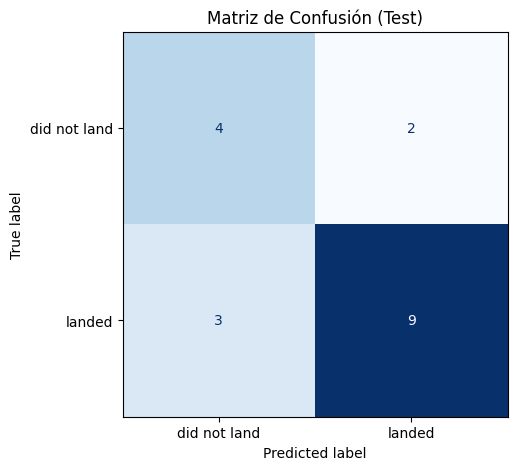

In [62]:
accuracy_knn_test = knn_cv.score(X_test, Y_test)
print("Precisión KNN en test:", round(accuracy_knn_test, 4))

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

We can plot the confusion matrix


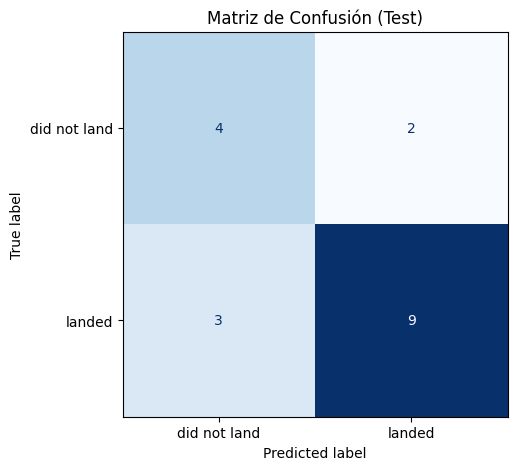

In [63]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


* El método que mejor funciona es Regresión Logística, con una precisión en test de 0.8889.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
